In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████▉                  | 220.7 MB 1.4 MB/s eta 0:03:22ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=ma

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
##we will be first of all importing some libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Epoch 1/30
536/536 [==============================] - 3s 4ms/step - loss: 0.5111 - accuracy: 0.7884 - val_loss: 0.4542 - val_accuracy: 0.8001
Epoch 2/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4631 - accuracy: 0.8052 - val_loss: 0.4378 - val_accuracy: 0.8080
Epoch 3/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4513 - accuracy: 0.8069 - val_loss: 0.4346 - val_accuracy: 0.8050
Epoch 4/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4386 - accuracy: 0.8153 - val_loss: 0.4255 - val_accuracy: 0.8160
Epoch 5/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4317 - accuracy: 0.8130 - val_loss: 0.4210 - val_accuracy: 0.8186
Epoch 6/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4265 - accuracy: 0.8196 - val_loss: 0.4126 - val_accuracy: 0.8266
Epoch 7/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4175 - accuracy: 0.8207 - val_loss: 0.4011 - val_accuracy: 0.8304
Epoch 

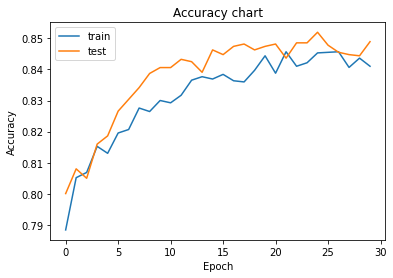

In [ ]:
dataset1=pd.read_csv("Churn_Modelling.csv")
dataset1.head()

## Dividing the dataset into independednt and dependedent features
## X is for Independent and Y for dependent
X = dataset1.iloc[:,3:13]
Y = dataset1.iloc[:,13]

## doing feature engineering like using one hot encoding
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)
X=X.drop(['Geography','Gender'],axis=1)
X.head()
X=pd.concat([X,geography,gender],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## creating the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

## initialize the ANN layer
classifier=Sequential()
classifier.add(Dense(units=11, activation = "LeakyReLU")) ## input layer 
classifier.add(Dropout(0.2))
## 1st hidden layer
classifier.add(Dense(units=24, activation = "LeakyReLU"))
classifier.add(Dropout(0.2))
## 2nd hidden layer
classifier.add(Dense(units=20, activation = "LeakyReLU"))
classifier.add(Dropout(0.2))
## 3rd hidden layer
classifier.add(Dense(units=9, activation = "LeakyReLU"))
classifier.add(Dropout(0.2))
##output layer
classifier.add(Dense(units=1, activation = "sigmoid"))

## compiling
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Early Stopping 
stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

## training the model
model = classifier.fit(X_train,Y_train,batch_size = 10, epochs = 30, validation_split = 0.33, callbacks=[stopping])
model.history.keys()
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.title("Accuracy chart")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"])
plt.show()



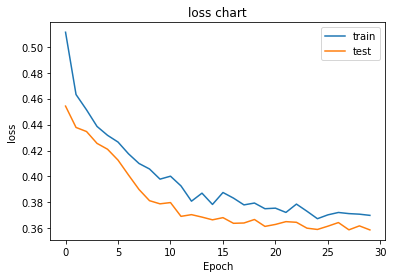

In [ ]:
##loss
plt.plot(model.history["loss"])
plt.plot(model.history["val_loss"])
plt.title("loss chart")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["train", "test"])
plt.show()

In [ ]:
## making the predictions 
Y_results = classifier.predict(X_test)
Y_results = (Y_results >= 0.5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
matrix=confusion_matrix(Y_test,Y_results)
final=accuracy_score(Y_test,Y_results)
final


0.8645